# import cv2



In [22]:
import cv2
print(cv2.__version__)

4.9.0


In [3]:
!pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [3]:
import sys
sys.executable


'C:\\Users\\USER\\anaconda3\\python.exe'

In [4]:
!{sys.executable} -m pip install opencv-python


# check version and confirm

In [6]:
import cv2
print(cv2.__version__)

4.9.0


In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# start and check samlples

In [16]:
img = cv2.imread("C:\POPSTAR\model\data set\jack harlow - Google Search\co_image_.jpg")
img.shape

(320, 320, 3)

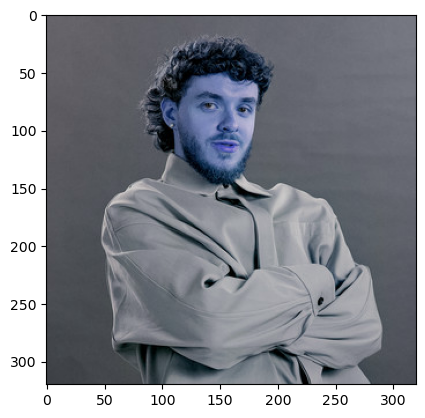

In [7]:
plt.imshow(img)

In [8]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

# #gray picture


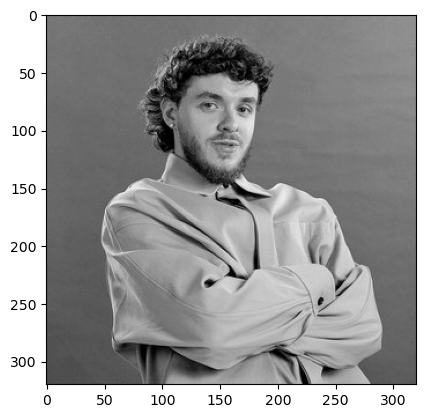

In [9]:
plt.imshow(gray, cmap='gray')

# use hard cascade to detect eyes.open cv documentstion


In [10]:
face_cascade = cv2.CascadeClassifier("C:/POPSTAR/model/HARDCASCADE/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/POPSTAR/model/HARDCASCADE/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
faces

array([[117,  48,  81,  81]])

parameters in the array meant

#The first element (117) is the x-coordinate of the top-left corner of the detected face bounding box. The second element (48) is the y-coordinate of the top-left corner of the detected face bounding box. The third element (81) is the width of the detected face bounding box. The fourth element (81) is the height of the detected face bounding box.

In [11]:
(x,y,w,h)=faces[0]
x,y,w,h

(117, 48, 81, 81)

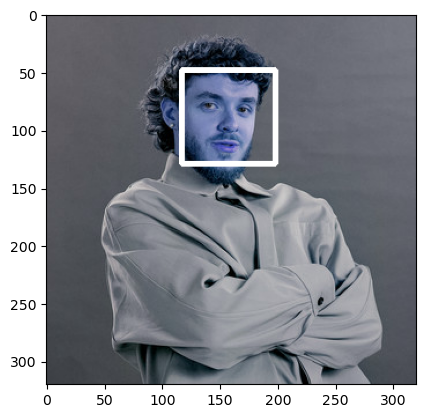

In [12]:
face_img=cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
plt.imshow(face_img)

EXPLAINING THE CODE:20

(x, y, w, h) = faces[0], the values (x, y, w, h) are being unpacked from the first element of the faces array.

x: The x-coordinate of the top-left y: The y-coordinate of the top-left w: The width of the detected face bounding h: The height of the detected face bounding

EXPLAINING THE CODE:22

This code draws a white rectangle around the first detected face using the cv2.rectangle function. The (255, 255, 255) specifies the color of the rectangle,, and 3 is the thickness of the rectangle.

In [17]:
cv2.destroyAllWindows() # close all the OpenCV windows that are currently open.
for (x, y, w, h) in faces:
    face_img=cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    cv2.imshow('Eye Detection', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#used codes refering cv2 documentation.

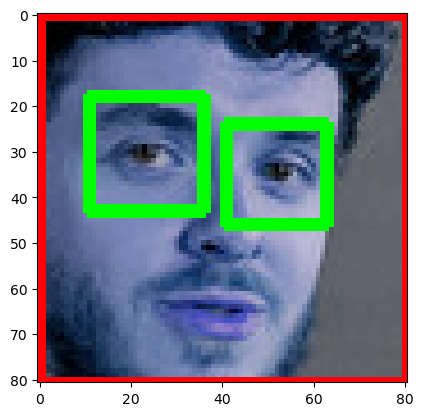

In [18]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')


# make a loop and going through every image in reference folder


In [27]:
path2data="C:\POPSTAR\model\data set"
path2croppeddata="C:\POPSTAR\model\Cropped images"

list_img_directories=[]
import os

for i in os.scandir(path2data):
    if i.is_dir():
        list_img_directories.append(i.path)
        
        

In [24]:
print(list_img_directories)

['C:\\POPSTAR\\model\\data set\\bruno mars pictures - Google Search', 'C:\\POPSTAR\\model\\data set\\drake - Google Search', 'C:\\POPSTAR\\model\\data set\\jack harlow - Google Search', 'C:\\POPSTAR\\model\\data set\\post malone - Google Search', 'C:\\POPSTAR\\model\\data set\\the weeknd - Google Search']


In [28]:
import shutil #sert of file handling
if os.path.exists(path2croppeddata):
    shutil.rmtree(path2croppeddata) #remove if existed
os.mkdir(path2croppeddata)  

In [29]:
cropped_image_dirs=[]
POPStar_file_name_dirs={}

for images in list_img_directories:
    POPStar_name=images.split('/')[-1]
    print(POPStar_name)
    
    for entry in os.scandir(images):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + POPStar_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generationg crops......",cropped_folder)
            
            cropped_fole_name=POPStar_name+str(count)+".png"
            croped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dics[celebrity_name].append(cropped_file_path)
            count+=1

C:\POPSTAR\model\data set\bruno mars pictures - Google Search


NameError: name 'get_cropped_image_if_2_eyes' is not defined

In [30]:
import cv2
import os

cropped_image_dirs = []
celebrity_file_names_dict = {}

def get_cropped_image_if_2_eyes(image_path):
    pass

for images in list_img_directories:
    POPStar_name = images.split('\')[-1]  
    print(POPStar_name)
    
    count = 1  
    
    for entry in os.scandir(images):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            cropped_folder = path2croppeddata + "\\" + POPStar_name  # Update this for Windows paths
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating crops...", cropped_folder)
            
            cropped_file_name = POPStar_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)
            
            if celebrity_name not in celebrity_file_names_dict:
                celebrity_file_names_dict[celebrity_name] = []
            
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


bruno mars pictures - Google Search
drake - Google Search
jack harlow - Google Search
post malone - Google Search
the weeknd - Google Search
